In [22]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('/Users/johnnydevriese/projects/data/penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
187,48.4,16.3,22.0,54.00,1
303,49.5,19.0,20.0,38.00,2
196,50.5,15.9,22.2,55.50,1
16,38.7,19.0,19.5,34.50,0
85,41.3,20.3,19.4,35.50,0
234,47.4,14.6,21.2,47.25,1
145,39.0,18.7,18.5,36.50,0
21,37.7,18.7,18.0,36.00,0
30,39.5,16.7,17.8,32.50,0
330,42.5,17.3,18.7,33.50,2


In [23]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 42.7 18.3 19.6 40.75 0 ] Adelie
[ 37.9 18.6 19.3 29.25 0 ] Adelie
[ 39.0 17.1 19.1 30.5 0 ] Adelie
[ 50.2 18.8 20.2 38.0 2 ] Chinstrap
[ 45.2 14.8 21.2 52.0 1 ] Gentoo
[ 45.7 13.9 21.4 44.0 1 ] Gentoo
[ 38.8 20.0 19.0 39.5 0 ] Adelie
[ 43.8 13.9 20.8 43.0 1 ] Gentoo
[ 46.0 18.9 19.5 41.5 2 ] Chinstrap
[ 49.4 15.8 21.6 49.25 1 ] Gentoo


In [24]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')



Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


In [25]:
import torch
import torch.nn as nn
import torch.utils.data as torch_data

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0


In [26]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = torch_data.TensorDataset(train_x,train_y)
train_loader = torch_data.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = torch_data.TensorDataset(test_x,test_y)
test_loader = torch_data.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')



Ready to load data


In [27]:
# Number of hidden layer nodes
hl = 10
hidden_layer_nodes = 10
initial_input_feature_dimension = len(features)
output_feature_dimension = len(penguin_classes)

# Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fully_connected1 = nn.Linear(in_features=len(features), out_features=hl, bias=True) # bias=True is default
        self.fully_connected2 = nn.Linear(hl, hl)
        self.fully_connected3 = nn.Linear(hl, len(penguin_classes))

    def forward(self, x):
        x = torch.relu(self.fully_connected1(x))
        x = torch.relu(self.fully_connected2(x))
        x = torch.relu(self.fully_connected3(x))
        return x

# Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fully_connected1): Linear(in_features=4, out_features=10, bias=True)
  (fully_connected2): Linear(in_features=10, out_features=10, bias=True)
  (fully_connected3): Linear(in_features=10, out_features=3, bias=True)
)


In [28]:
# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
# for epoch in range(1, epochs + 1):
for epoch in range(epochs):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 0
Training set: Average loss: 1.118814
Validation set: Average loss: 1.023595, Accuracy: 148/411 (36%)

Epoch: 1
Training set: Average loss: 1.010274
Validation set: Average loss: 0.983460, Accuracy: 163/411 (40%)

Epoch: 2
Training set: Average loss: 0.965314
Validation set: Average loss: 0.934165, Accuracy: 191/411 (46%)

Epoch: 3
Training set: Average loss: 0.911513
Validation set: Average loss: 0.867269, Accuracy: 250/411 (61%)

Epoch: 4
Training set: Average loss: 0.817720
Validation set: Average loss: 0.742112, Accuracy: 272/411 (66%)

Epoch: 5
Training set: Average loss: 0.733329
Validation set: Average loss: 0.691639, Accuracy: 302/411 (73%)

Epoch: 6
Training set: Average loss: 0.696301
Validation set: Average loss: 0.661350, Accuracy: 312/411 (76%)

Epoch: 7
Training set: Average loss: 0.671731
Validation set: Average loss: 0.640087, Accuracy: 327/411 (80%)

Epoch: 8
Training set: Average loss: 0.653092
Validation set: Average loss: 0.624311, Accuracy: 338/411 (82%)

E

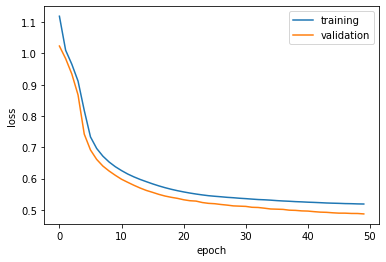

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [35]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fully_connected1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.17916061 -0.08960593  0.11843108  0.5180272 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.22086579  0.5711509  -0.40086356 -0.18697421]
 [ 0.31580442  0.24776897 -0.20200174  0.39890492]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.3545517  -0.15797205 -0.23337851  0.39141223]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.47349784  0.8002842   0.30180416  0.15444154]]
fully_connected1.bias 
 [ 0.02629578 -0.20744474  0.08459234 -0.46684736 -0.35585782 -0.45410082
  0.31546897  0.25728968 -0.22174752  0.24439509]
fully_connected2.weight 
 [[ 0.20224687  0.3143725   0.12550515  0.04272011  0.21202639 -0.18619564
   0.05892715 -0.24517313 -0.21917307 -0.16335806]
 [ 0.14308453  0.08098809 -0.18731831  0.09553465  0.7475572  -0.01170831
   0.01207405  0.03671877  0.19618031  0.71772873]
 [-0.24369258 -0.09592994  0.12428063  0

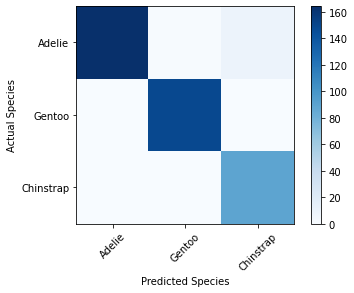

In [36]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [37]:
# Save the model weights
# model_file = '/User/johnnydevriese/projects/models/penguin_classifier.pt'
model_file = 'penguin_classifier.pt'
torch.save(model.state_dict(), f=model_file)
del model
print('model saved as', model_file)

model saved as penguin_classifier.pt


In [38]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo
